## Analyse de la vente de divers produits au Etats-Unis

In [1]:
import pandas as pd
import os

#### 1- Regrouper les 12 mois de ventes (fichier csv) en un seul fichier 

In [2]:
#Fichiers dans le dossier Sales_Data 

files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame() #initialise data frame vide 

for file in files :
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
     
all_months_data.to_csv("all_data.csv",index=False)

#### Stock et affiche le nouveau fichier csv 

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Nettoyer data 

In [4]:
#supprime les valeurs 'nan' du df
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

#supprime "Or"
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#Convertit collone avec un type correct 
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'] )

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Ajout de colonne utile au csv

In [5]:
# Ajout d'une colonne Month ( plus simple à lire que la date)
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32") #convertir en int

#Ajout collone sales
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

#ajout colonne ville
#utiliser fonction .apply() de pandas

def get_city(adress):
    return adress.split(',')[1]

def get_state(adress):
    return adress.split(',')[2].split(' ')[1]

all_data['City']=all_data ['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Le meilleurs mois pour vendre ? Combien d'argent gagné ce mois ? 

In [6]:
results = all_data.groupby('Month').sum()
#mois de decembre 

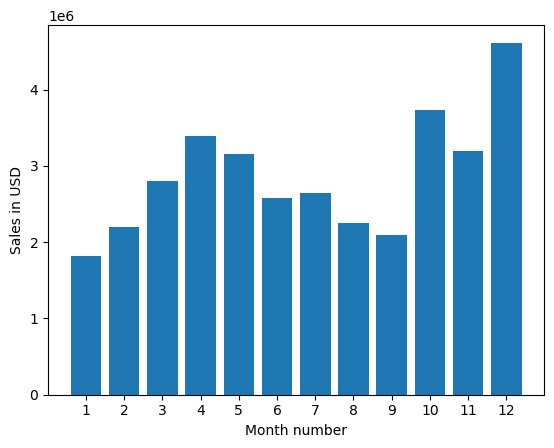

Ventes en decembre : 4613443.34 $


In [7]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month number")
plt.show()

somme_decembre = all_data[all_data.Month == 12]["Sales"].sum()
print("Ventes en decembre : " + str(somme_decembre) + " $")

#### La ville avec le plus de ventes

In [8]:
results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


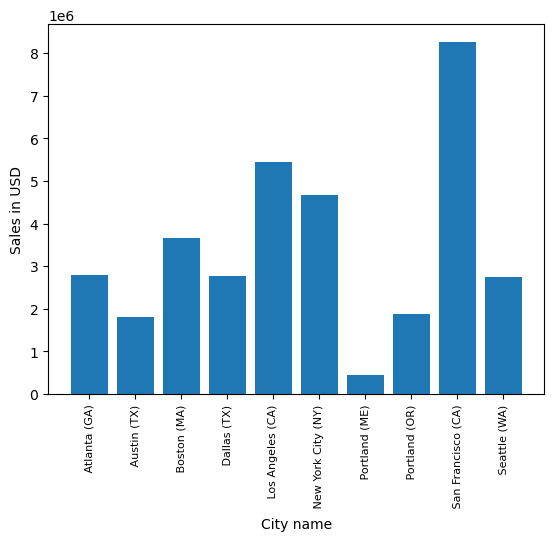

In [9]:
cities =[city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation ='vertical',size=8)
plt.ylabel("Sales in USD")
plt.xlabel("City name")
plt.show()


In [10]:
#san diego est la ville avec le plus de commandes 

#### Quand afficher des pubs pour maximiser l'envie d'acheter ? 

In [11]:
#prend du temps à charger 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [12]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


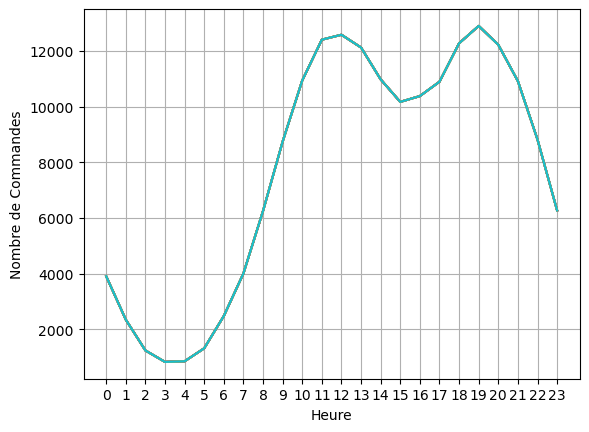

In [16]:
hours =[hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Heure')
plt.ylabel('Nombre de Commandes')

plt.grid()
plt.show()



In [14]:
#Le plus optimale serait d'afficher des pubs à environ 10h et 18h 

#### Quel sont les produits les plus souvent vendus ensembles ? 

In [15]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df

C:\Users\adanz\AppData\Local\Temp\ipykernel_10148\3699749694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"
